# WIMP Relic density

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as pe

# Plotting style
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rc('font', size=16)

main_colors = ["#e96859", "#9546ca", "#00cc00", "#80bfff"]

path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal(), 
              pe.SimpleLineShadow(alpha = 0, offset=(1,-1))]
import csv
def load_csv(filename, dataset=0, skip_rows = 0, sort = True):
    with open(filename) as csvfile:
        file = csv.reader(csvfile)
        
        # skip header
        for i in range(skip_rows):
            next(file, None)
        x = []; y = []
        for row in file:
            try:
                x.append(float(row[2*dataset+0]))
                y.append(float(row[2*dataset+1]))
            except:
                pass
    # sort by x value
    if sort == True:
        y = [yi for _,yi in sorted(zip(x,y))]
        x = sorted(x)
    return np.asarray(x), np.asarray(y)

from scipy.interpolate import interp1d

def logInt(x,y,kind='cubic'):
    # Interpolate log scaled relation
    interp = interp1d(np.log10(x), np.log10(y), kind=kind,
                               bounds_error=None, 
                               fill_value="extrapolate")
    
    def outFunc(newX):
        return 10**interp(np.log10(newX))
    
    return outFunc
    

## WIMP abundance

(1000000,)


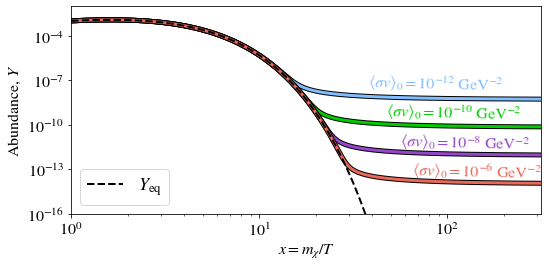

In [33]:
x, cross_sections, Yeq, Y = np.load("data/WIMP_abundance.npy", allow_pickle = True)
print(Y[0].shape)

fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(111)


for i, sig in enumerate(cross_sections):
    plt.loglog(x, Y[i], lw = 3, color = main_colors[::-1][i], path_effects = path_effects)
    label = r"$\langle \sigma v \rangle_0 = 10^{"+\
    "{}".format(int(np.log10(sig))) + \
    "}$ GeV$^{-2}$"
    plt.annotate(label, (38+i*9, Y[i][-1]*2/(i/7+0.5)), color = main_colors[::-1][i],
                 rotation = -1.4, size = 16)
    
plt.loglog(x, Yeq,"k--", lw = 2, label = "$Y_{\mathrm{eq}}$")
plt.ylim(1e-16, 1e-2)
plt.ylabel("Abundance, $Y$")
plt.xlabel("$x = m_{\chi}/T$")
plt.xlim(min(x), max(x))
plt.legend(loc=3, prop={"size":18})
# plt.annotate('', xy=(9, 1e-13), xytext=(9, 5e-8), 
#             arrowprops=dict(facecolor='black', shrink=0.))

# label = r'''$Y_{\infty}$ decreases with
#    increasing $\langle \sigma v \rangle$'''
# plt.annotate(label, (1.5, 2.5e-11), size = 17);
plt.tight_layout()
plt.savefig("wimp_abundance.pdf", bbox_inches='tight')

## Calculating the relic density $\Omega_{\chi}h^2$

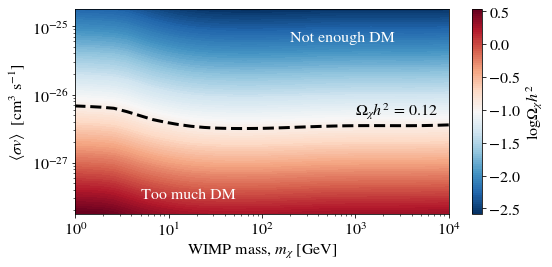

In [4]:
masses, cross_sections, omega = np.load("data/relic_density.npy", allow_pickle = True)

plt.figure(figsize = (8,4))
z = np.log10(omega)
lims = np.linspace(z.min(), z.max(), 100)
for i in range(4):
    CS = plt.contourf(masses, cross_sections, z, lims, cmap = "RdBu_r")
cbar = plt.colorbar(ticks=np.linspace(-2.5, 0.5, 7))
cbar.set_label('$\log{\Omega_{\chi}h^2}$')
plt.contour(CS, levels=[np.log10(0.12)], colors='k', linewidths = 3, linestyles = '--')
plt.xlabel(r"WIMP mass, $m_{\chi}$ [GeV]");
plt.ylabel(r"$\langle \sigma v \rangle$  [cm$^3$ s$^{-1}]$");
plt.xscale("log")
plt.yscale("log")

## Too much - too little
plt.annotate("Too much DM", (5, 3e-28), color = "white")
plt.annotate("Not enough DM", (2e2, 6e-26), color = "white")

plt.annotate("$\Omega_{\chi}h^2$ = 0.12", (1e3, 5e-27),rotation = 0, color = "k")


plt.tight_layout()
plt.savefig("wimp_relic_density.pdf", bbox_inches='tight')
plt.show()